PHÂN TÍCH MÔ TẢ

In [22]:
#Khởi tạo SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Diabetes").getOrCreate()

df = spark.read.csv(
    "output/cleaned_data.csv",
    header=True,
    inferSchema=True
)

In [28]:
df.show()

+---+----------------------------------+----------+-----------------------+----+-----------+---------------+-------------+---------------+-----+-------------------+
|age|physical_activity_minutes_per_week|diet_score|family_history_diabetes| bmi|systolic_bp|hdl_cholesterol|triglycerides|glucose_fasting|hba1c|diabetes_risk_score|
+---+----------------------------------+----------+-----------------------+----+-----------+---------------+-------------+---------------+-----+-------------------+
| 58|                               215|       5.7|                      0|30.5|        134|             41|          145|            136| 8.18|               29.6|
| 48|                               143|       6.7|                      0|23.1|        129|             55|           30|             93| 5.63|               23.0|
| 60|                                57|       6.4|                      1|22.2|        115|             66|           36|            118| 7.51|               44.7|
| 74|     

In [23]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- physical_activity_minutes_per_week: integer (nullable = true)
 |-- diet_score: double (nullable = true)
 |-- family_history_diabetes: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- systolic_bp: integer (nullable = true)
 |-- hdl_cholesterol: integer (nullable = true)
 |-- triglycerides: integer (nullable = true)
 |-- glucose_fasting: integer (nullable = true)
 |-- hba1c: double (nullable = true)
 |-- diabetes_risk_score: double (nullable = true)



In [24]:
df.count()


100000

In [32]:
df1 = df.toPandas()
df1.describe().round(2)

,age,physical_activity_minutes_per_week,diet_score,family_history_diabetes,bmi,systolic_bp,hdl_cholesterol,triglycerides,glucose_fasting,hba1c,diabetes_risk_score
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,50.12,118.91,5.99,0.22,25.61,115.80,54.04,121.46,111.12,6.52,30.22
std,15.60,84.41,1.78,0.41,3.59,14.28,10.27,43.37,13.60,0.81,9.06
min,18.00,0.00,0.00,0.00,15.00,90.00,20.00,30.00,60.00,4.00,2.70
25%,39.00,57.00,4.80,0.00,23.20,106.00,47.00,91.00,102.00,5.97,23.80
50%,50.00,100.00,6.00,0.00,25.60,116.00,54.00,121.00,111.00,6.52,29.00
75%,61.00,160.00,7.20,0.00,28.00,125.00,61.00,151.00,120.00,7.07,35.60
max,90.00,833.00,10.00,1.00,39.20,179.00,98.00,344.00,172.00,9.80,67.20


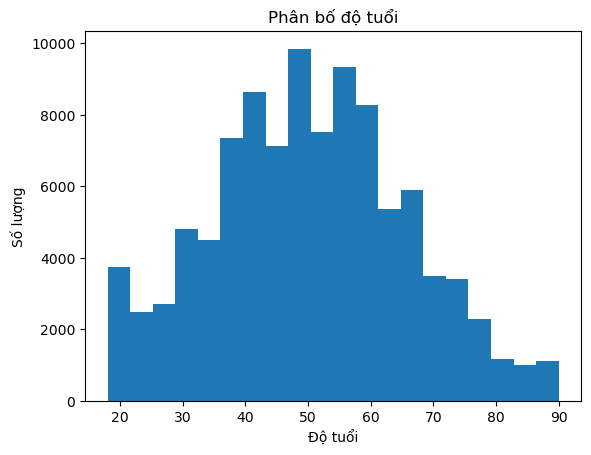

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = df.toPandas()

plt.figure()
plt.hist(pdf["age"], bins=20)
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng")
plt.title("Phân bố độ tuổi")
plt.show()

Biểu đồ histogram cho thấy độ tuổi phân bố trên nhiều nhóm khác nhau, tập trung chủ yếu ở nhóm tuổi trưởng thành. Điều này phù hợp với mục tiêu nghiên cứu nguy cơ mắc bệnh tiểu đường.

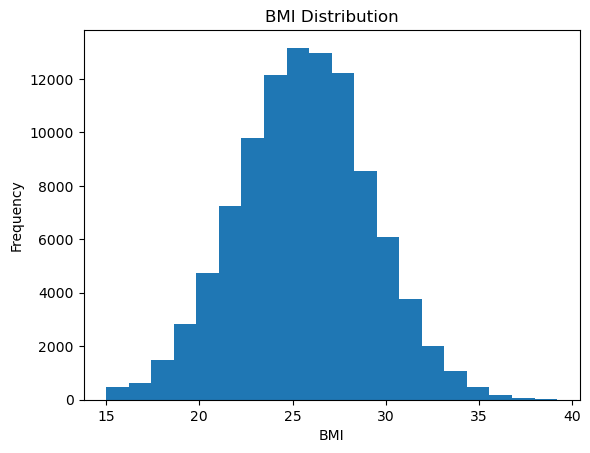

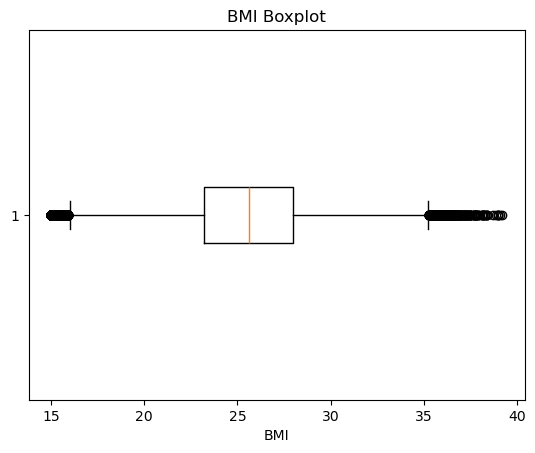

In [17]:
plt.figure()
plt.hist(pdf["bmi"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")
plt.show()

plt.figure()
plt.boxplot(pdf["bmi"], vert=False)
plt.xlabel("BMI")
plt.title("BMI Boxplot")
plt.show()


Chỉ số BMI có sự phân bố rộng và xuất hiện một số giá trị ngoại lai. Điều này cho thấy sự khác biệt rõ rệt về thể trạng giữa các cá nhân, yếu tố quan trọng ảnh hưởng đến nguy cơ tiểu đường.

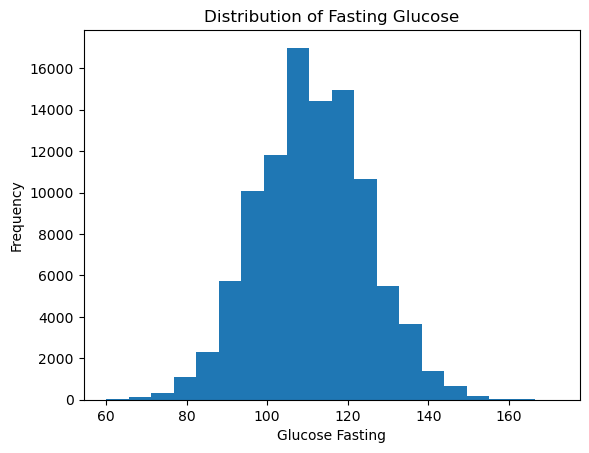

In [18]:
plt.figure()
plt.hist(pdf["glucose_fasting"], bins=20)
plt.xlabel("Glucose Fasting")
plt.ylabel("Frequency")
plt.title("Distribution of Fasting Glucose")
plt.show()


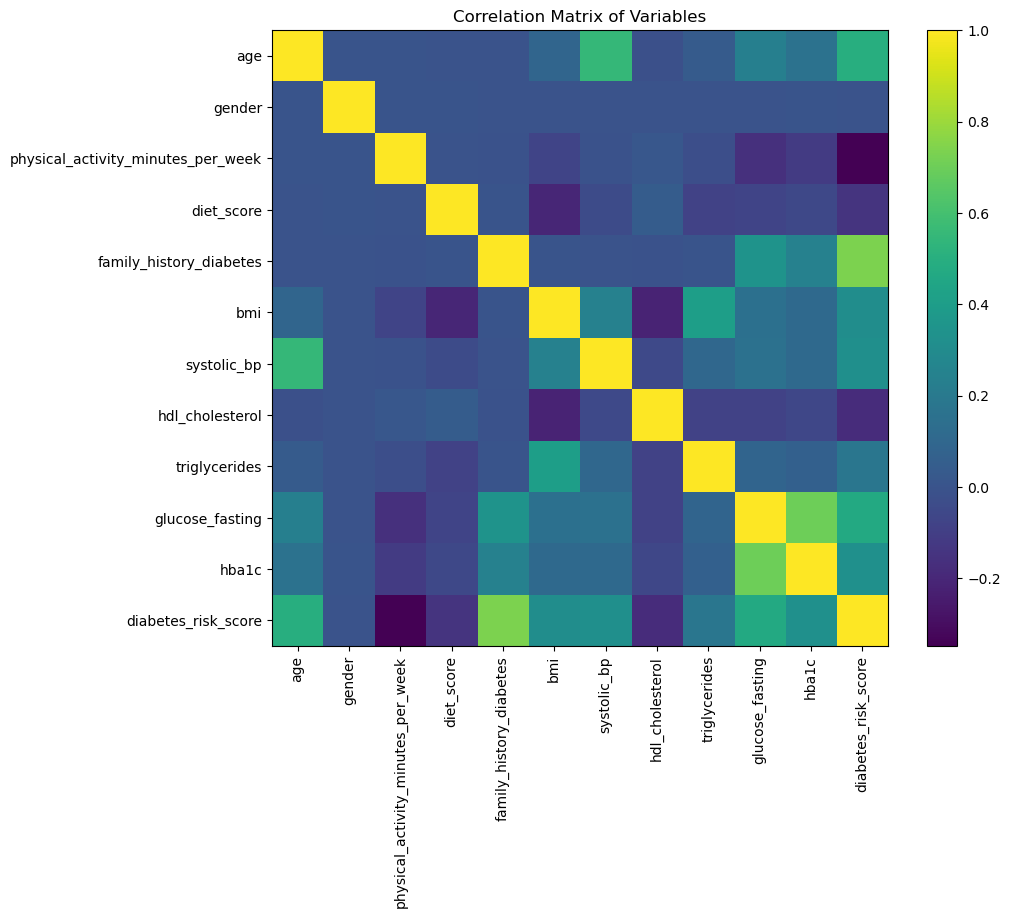

In [19]:

corr_matrix = pdf.corr(method="pearson")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of Variables")
plt.show()



In [20]:
risk_corr = corr_matrix["diabetes_risk_score"].sort_values(ascending=False)
print(risk_corr)


diabetes_risk_score                   1.000000
family_history_diabetes               0.733085
age                                   0.495924
glucose_fasting                       0.469938
hba1c                                 0.329947
systolic_bp                           0.323591
bmi                                   0.313813
triglycerides                         0.180484
gender                               -0.002048
diet_score                           -0.144891
hdl_cholesterol                      -0.174459
physical_activity_minutes_per_week   -0.348121
Name: diabetes_risk_score, dtype: float64


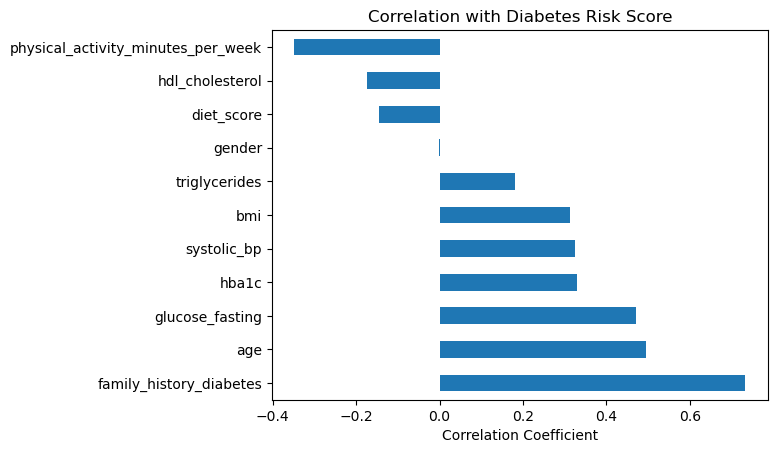

In [21]:
risk_corr.drop("diabetes_risk_score").plot(kind="barh")
plt.xlabel("Correlation Coefficient")
plt.title("Correlation with Diabetes Risk Score")
plt.show()
